In [9]:
from NHITS import NHITS_HierE2E
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import evaluation
import seaborn as sns
from hierarchicalforecast.utils import HierarchicalPlot
sns.set_theme('notebook', 'white')

# Evaluate reconciliation method 

This code : 
- Loads model checkpoints (pretrained)
- plots evaluation on the test set using neuralforecast evaluation function and data formatting ofr consistency with benchmarks
- All metrics are measured based on 3 seeded runs 

For HierE2E architecture the following are considered (NN hyperparameters are the same for all runs):

#### Reconciliation method

- None (not coherent): $$\tilde{\bf{y}}_t = \hat{\bf{y}}_t$$ 

- Bottom-up : $$\tilde{\bf{y}}_t = S \hat{\bf{b}}_t = SG\hat{\bf{y}}_t$$ 

- Projection :  $$\tilde{\bold{y}}_t = \mathrm{argmin}\|\hat{\bold{y}}_t - \bold{y} \| $$ 
s.t. $$\{\bf{y}_t |\bf{y}_t \in \mathrm{null}(\bf{A}) \}$$ $$\bf{A} = \begin{bmatrix}I | -\bf{S} \end{bmatrix}$$


#### Scoring metrics / training losses


- likelihood : $$ \mathcal{L}(\bold{y}_t,\Pi_{\theta}) = - \mathrm{log}(\Pi_{\theta}(\bold{y}_t) ) $$

- CRPS (scaled by abs value): $$\mathrm{CRPS}(\Pi,\bold{y_t}) = \frac{1}{2}\mathrm{E}_{\Pi,\Pi}[|X-Y|] - \mathrm{E}_{\Pi}[|X- \bold{y}_t|]  $$

- scaled CRPS (from https://arxiv.org/abs/1912.05642) : $$\mathrm{CRPS}(\Pi,\bold{y_t}) = - \frac{\mathrm{E}_{\Pi}[|X- \bold{y}_t|] }{\mathrm{E}_{\Pi,\Pi}[|X-Y|]} - \frac{1}{2} \mathrm{log}(\mathrm{E}_{\Pi,\Pi}[|X-Y|]) $$


In [3]:
models_dict = {
    'NHITS' : NHITS_HierE2E
}
recon = ['BU', 'none', 'proj']
seed = ['CRPS']
runs = [0,1,2]
eval_HierE2E, Y_fin, _ = evaluation('HierE2E', models_dict, recon, seed, runs)

/tmp/ipykernel_1498/645182387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/645182387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/645182387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/645182387.py:14: FutureWarning: 

Passing `palette` without assignin

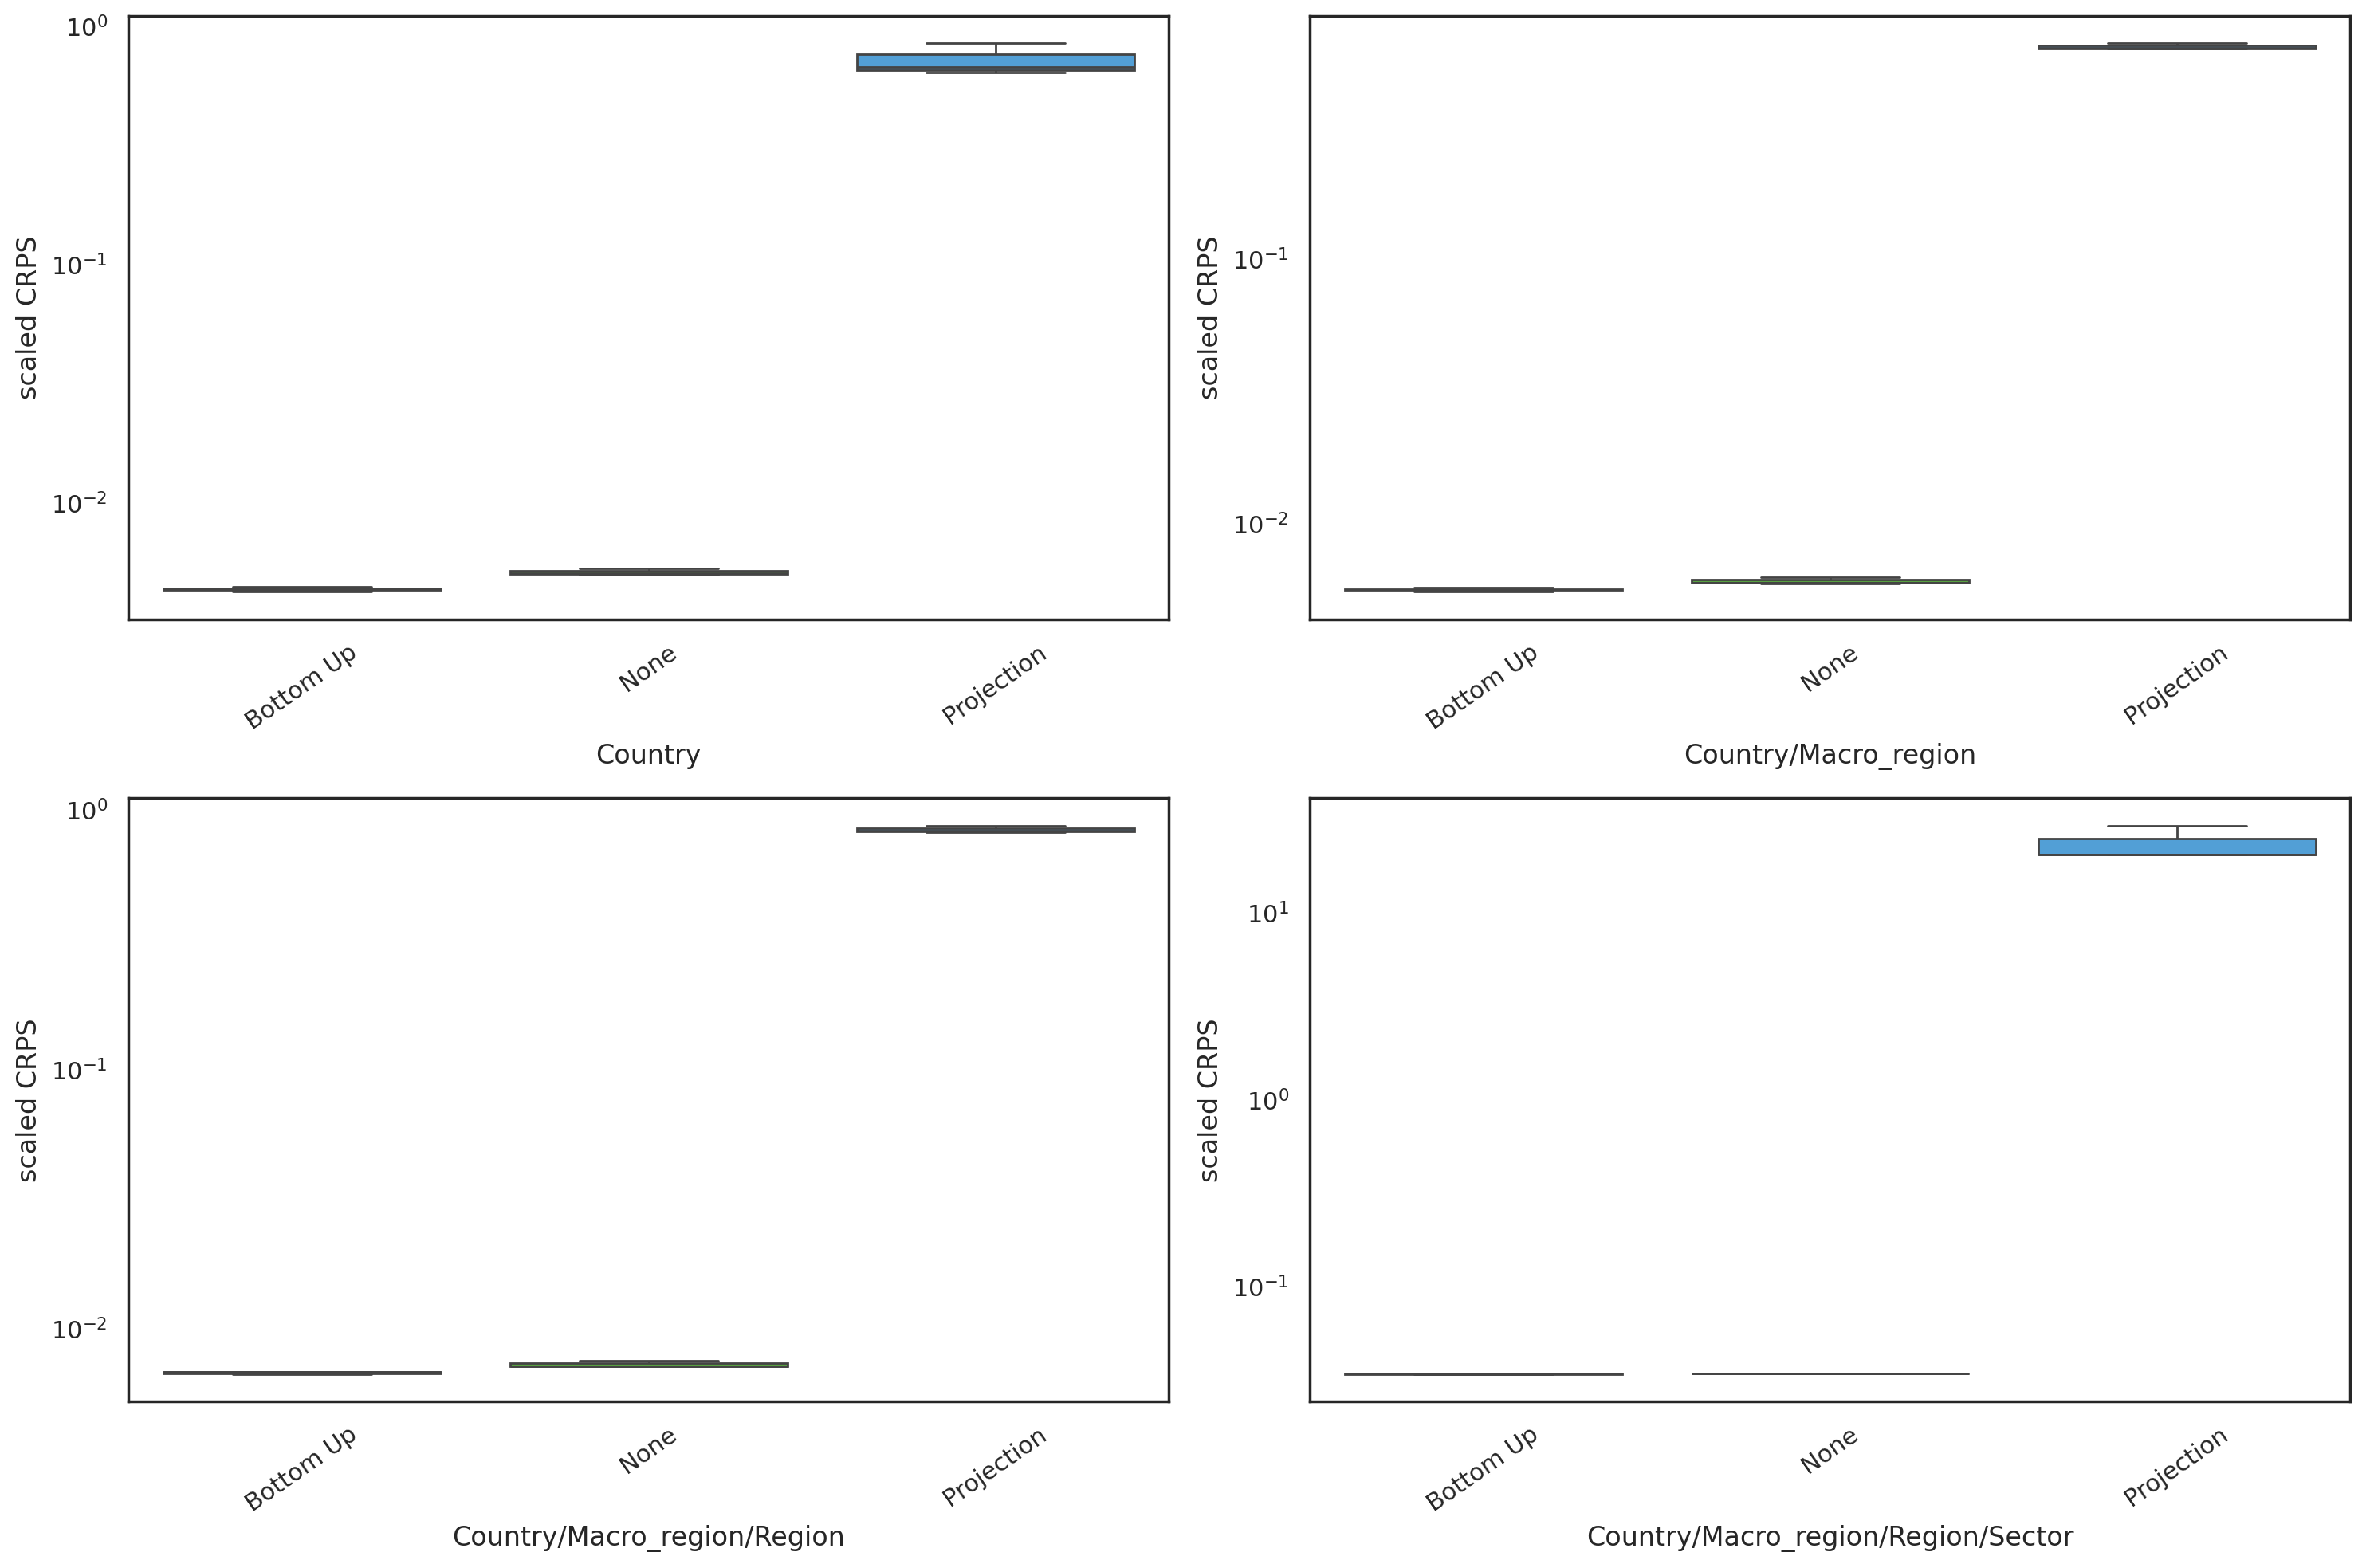

In [6]:
fig, axs = plt.subplots(2,2, figsize = (15,10), sharex = False, dpi = 200)
evv = eval_HierE2E.melt(id_vars = ['level', 'metric'])
evv['variable'] = evv['variable'].str[:-2]
T = evv.variable.unique()
for i,a in enumerate(T) :
    a = a.replace('HierE2E_NHITS_BU_CRPS', 'Bottom Up')
    a = a.replace('HierE2E_NHITS_none_CRPS', 'None')
    a = a.replace('HierE2E_NHITS_proj_CRPS', 'Projection')
    a = a.replace('Auto', '')
    a = a.replace('MinTrace_method-mint_shrink', 'MinT')
    T[i] = a
for k, level in zip(range(4),eval_HierE2E['level'].unique()):
    evs = evv.query(f'metric == "scaled_crps" & level == "{level}"')
    sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
    axs[k//2,k%2].set_ylabel(' ')
    axs[k//2,k%2].set_xlabel(f'{level}')
    axs[k//2,k%2].set_yscale('log')
    axs[k//2,k%2].set_ylabel('scaled CRPS')
    axs[k//2,k%2].set_xticks(ticks = range(3), labels= T, rotation=35) 
plt.tight_layout()
plt.savefig('./recon_HierE2E', transparent = True, dpi = 400)

/tmp/ipykernel_1498/820708846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/820708846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/820708846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/820708846.py:15: FutureWarning: 

Passing `palette` without assignin

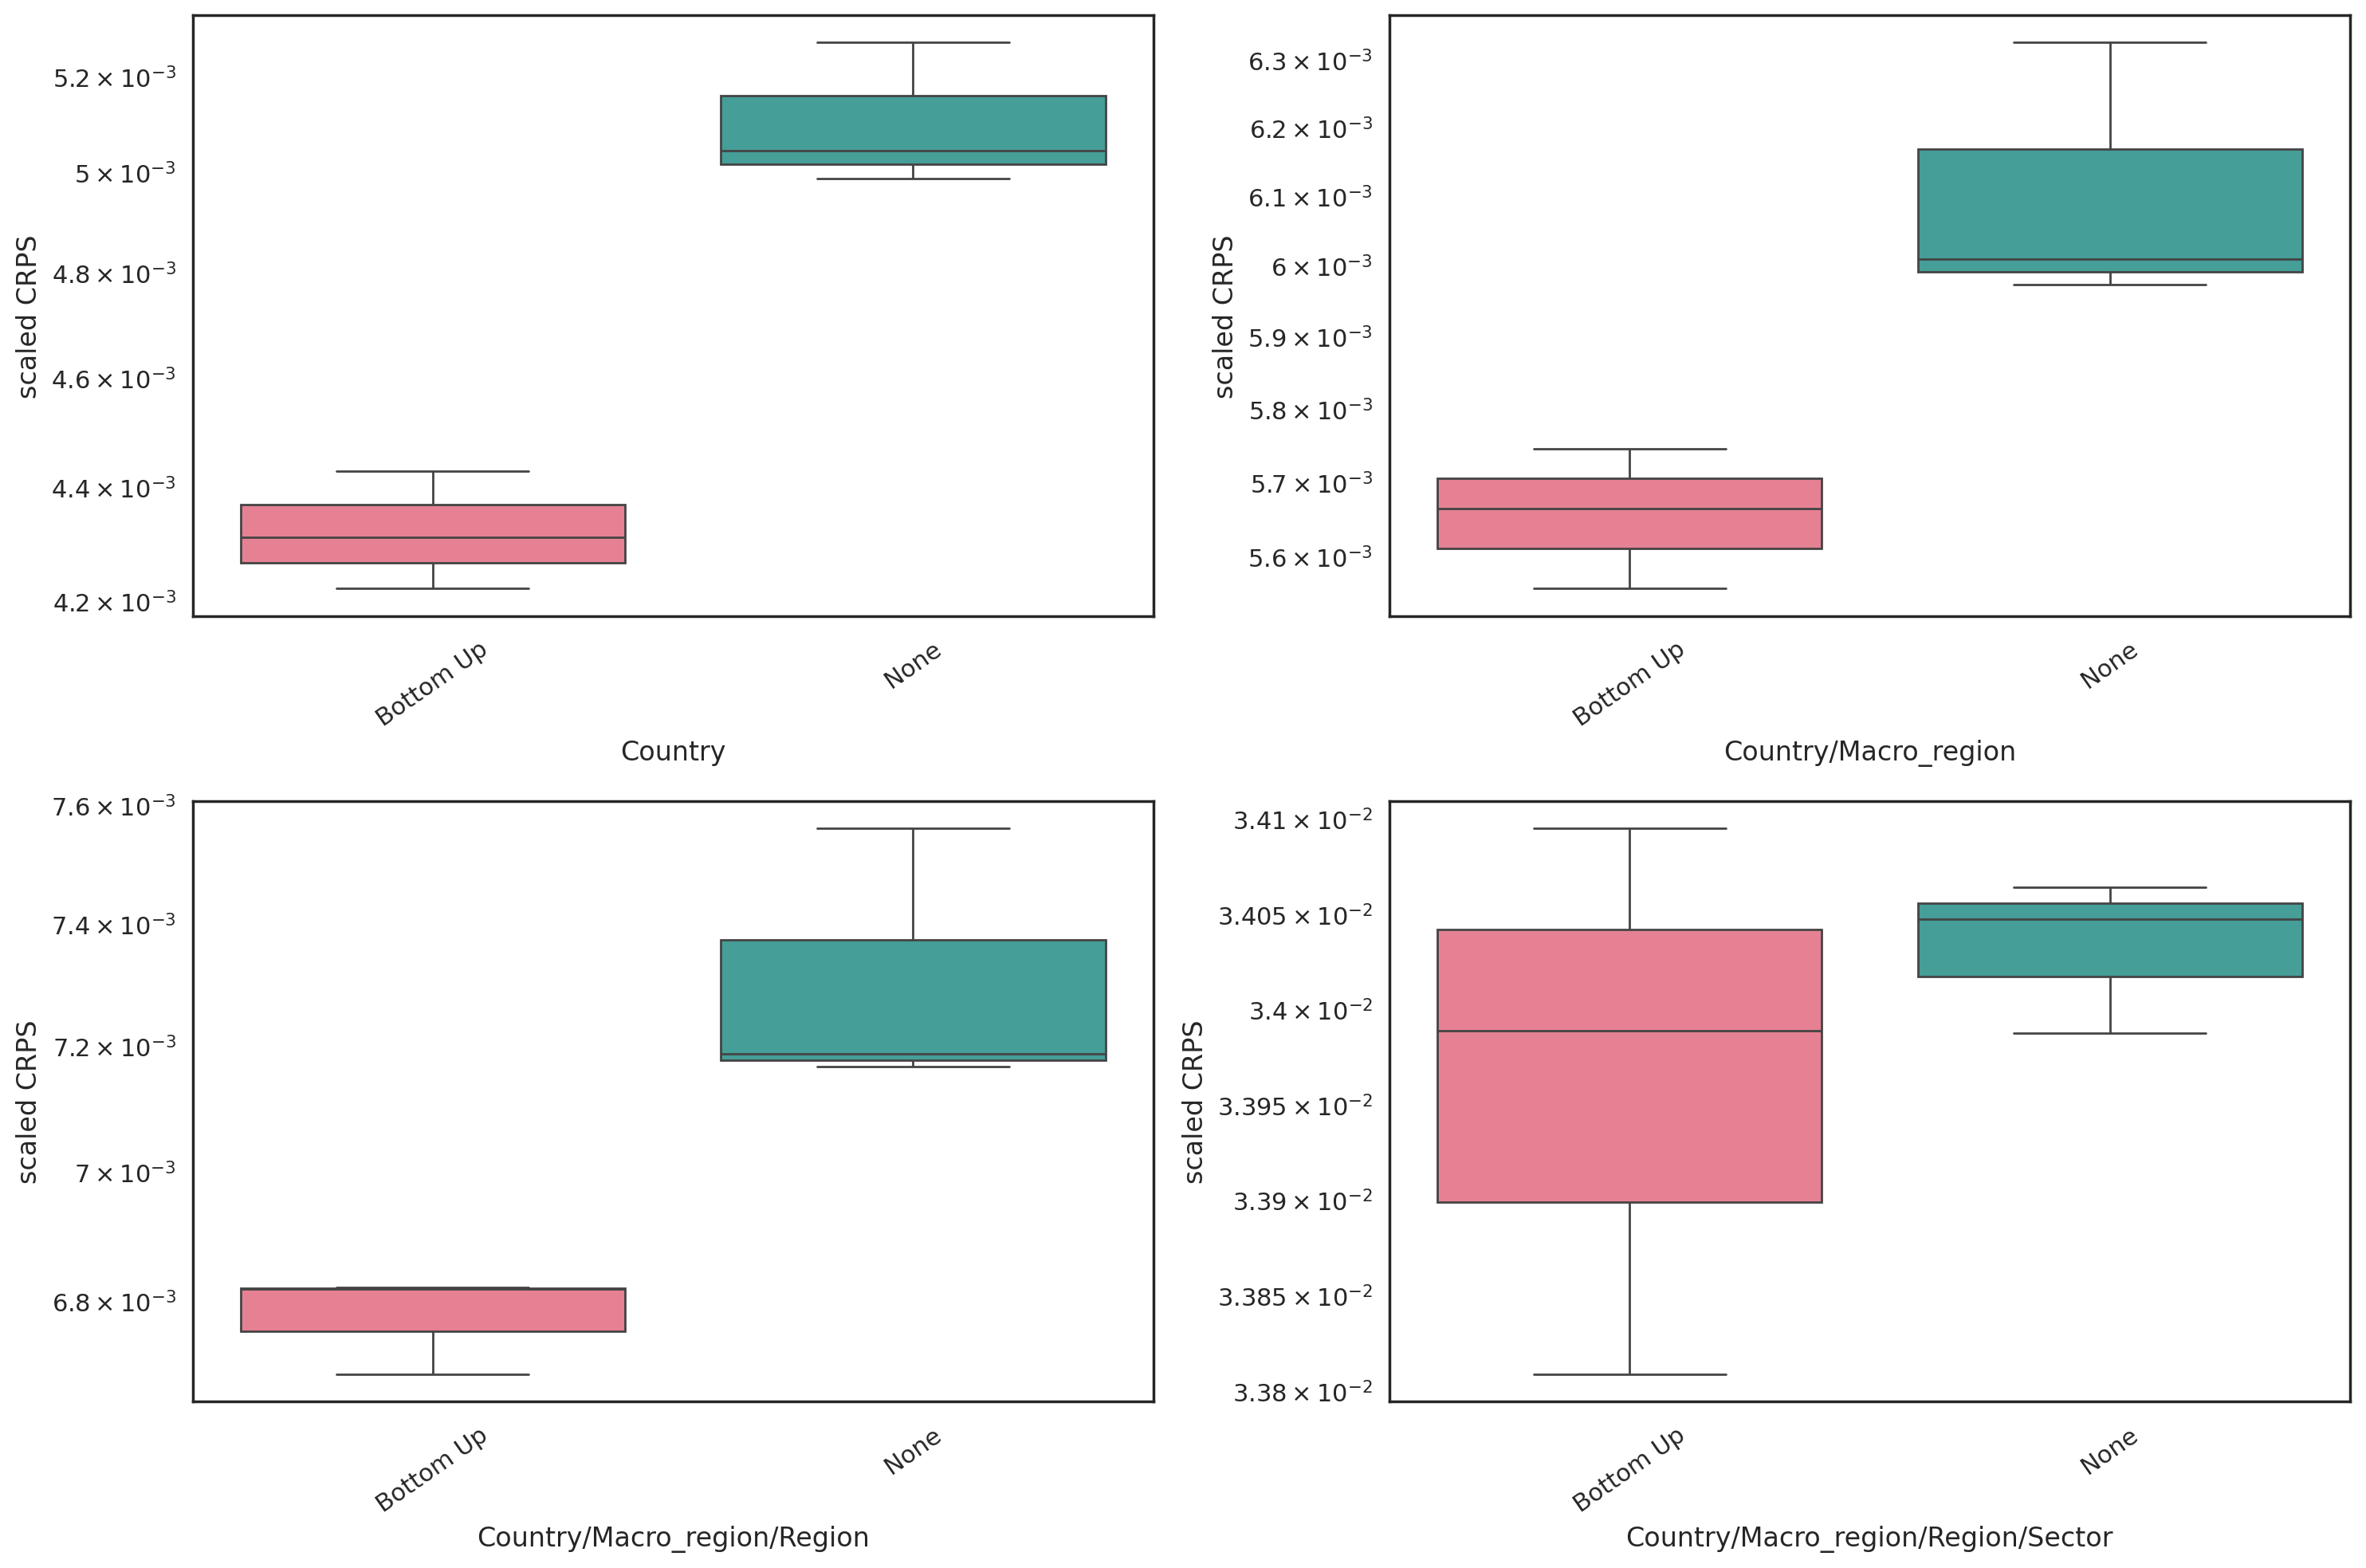

In [13]:
fig, axs = plt.subplots(2,2, figsize = (15,10), sharex = False, dpi = 200)
evv = eval_HierE2E.melt(id_vars = ['level', 'metric'])
evv['variable'] = evv['variable'].str[:-2]
evv = evv.query('variable != "HierE2E_NHITS_proj_CRPS"')
T = evv.variable.unique()
for i,a in enumerate(T) :
    a = a.replace('HierE2E_NHITS_BU_CRPS', 'Bottom Up')
    a = a.replace('HierE2E_NHITS_none_CRPS', 'None')
    a = a.replace('HierE2E_NHITS_proj_CRPS', 'Projection')
    a = a.replace('Auto', '')
    a = a.replace('MinTrace_method-mint_shrink', 'MinT')
    T[i] = a
for k, level in zip(range(4),eval_HierE2E['level'].unique()):
    evs = evv.query(f'metric == "scaled_crps" & level == "{level}"')
    sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
    axs[k//2,k%2].set_ylabel(' ')
    axs[k//2,k%2].set_xlabel(f'{level}')
    axs[k//2,k%2].set_yscale('log')
    axs[k//2,k%2].set_ylabel('scaled CRPS')
    axs[k//2,k%2].set_xticks(ticks = range(2), labels= T, rotation=35) 
plt.tight_layout()
plt.savefig('./recon_HierE2E_noproj', transparent = True, dpi = 400)

In [11]:
models_dict = {
    'NHITS' : NHITS_HierE2E
}
recon = ['BU']
seed = ['CRPS', 'sCRPS', 'likelihood']
runs = [0,1,2]
eval_HierE2E, Y_fin, _ = evaluation('HierE2E', models_dict, recon, seed, runs)

/tmp/ipykernel_1498/1275060745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/1275060745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/1275060745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
/tmp/ipykernel_1498/1275060745.py:14: FutureWarning: 

Passing `palette` without assi

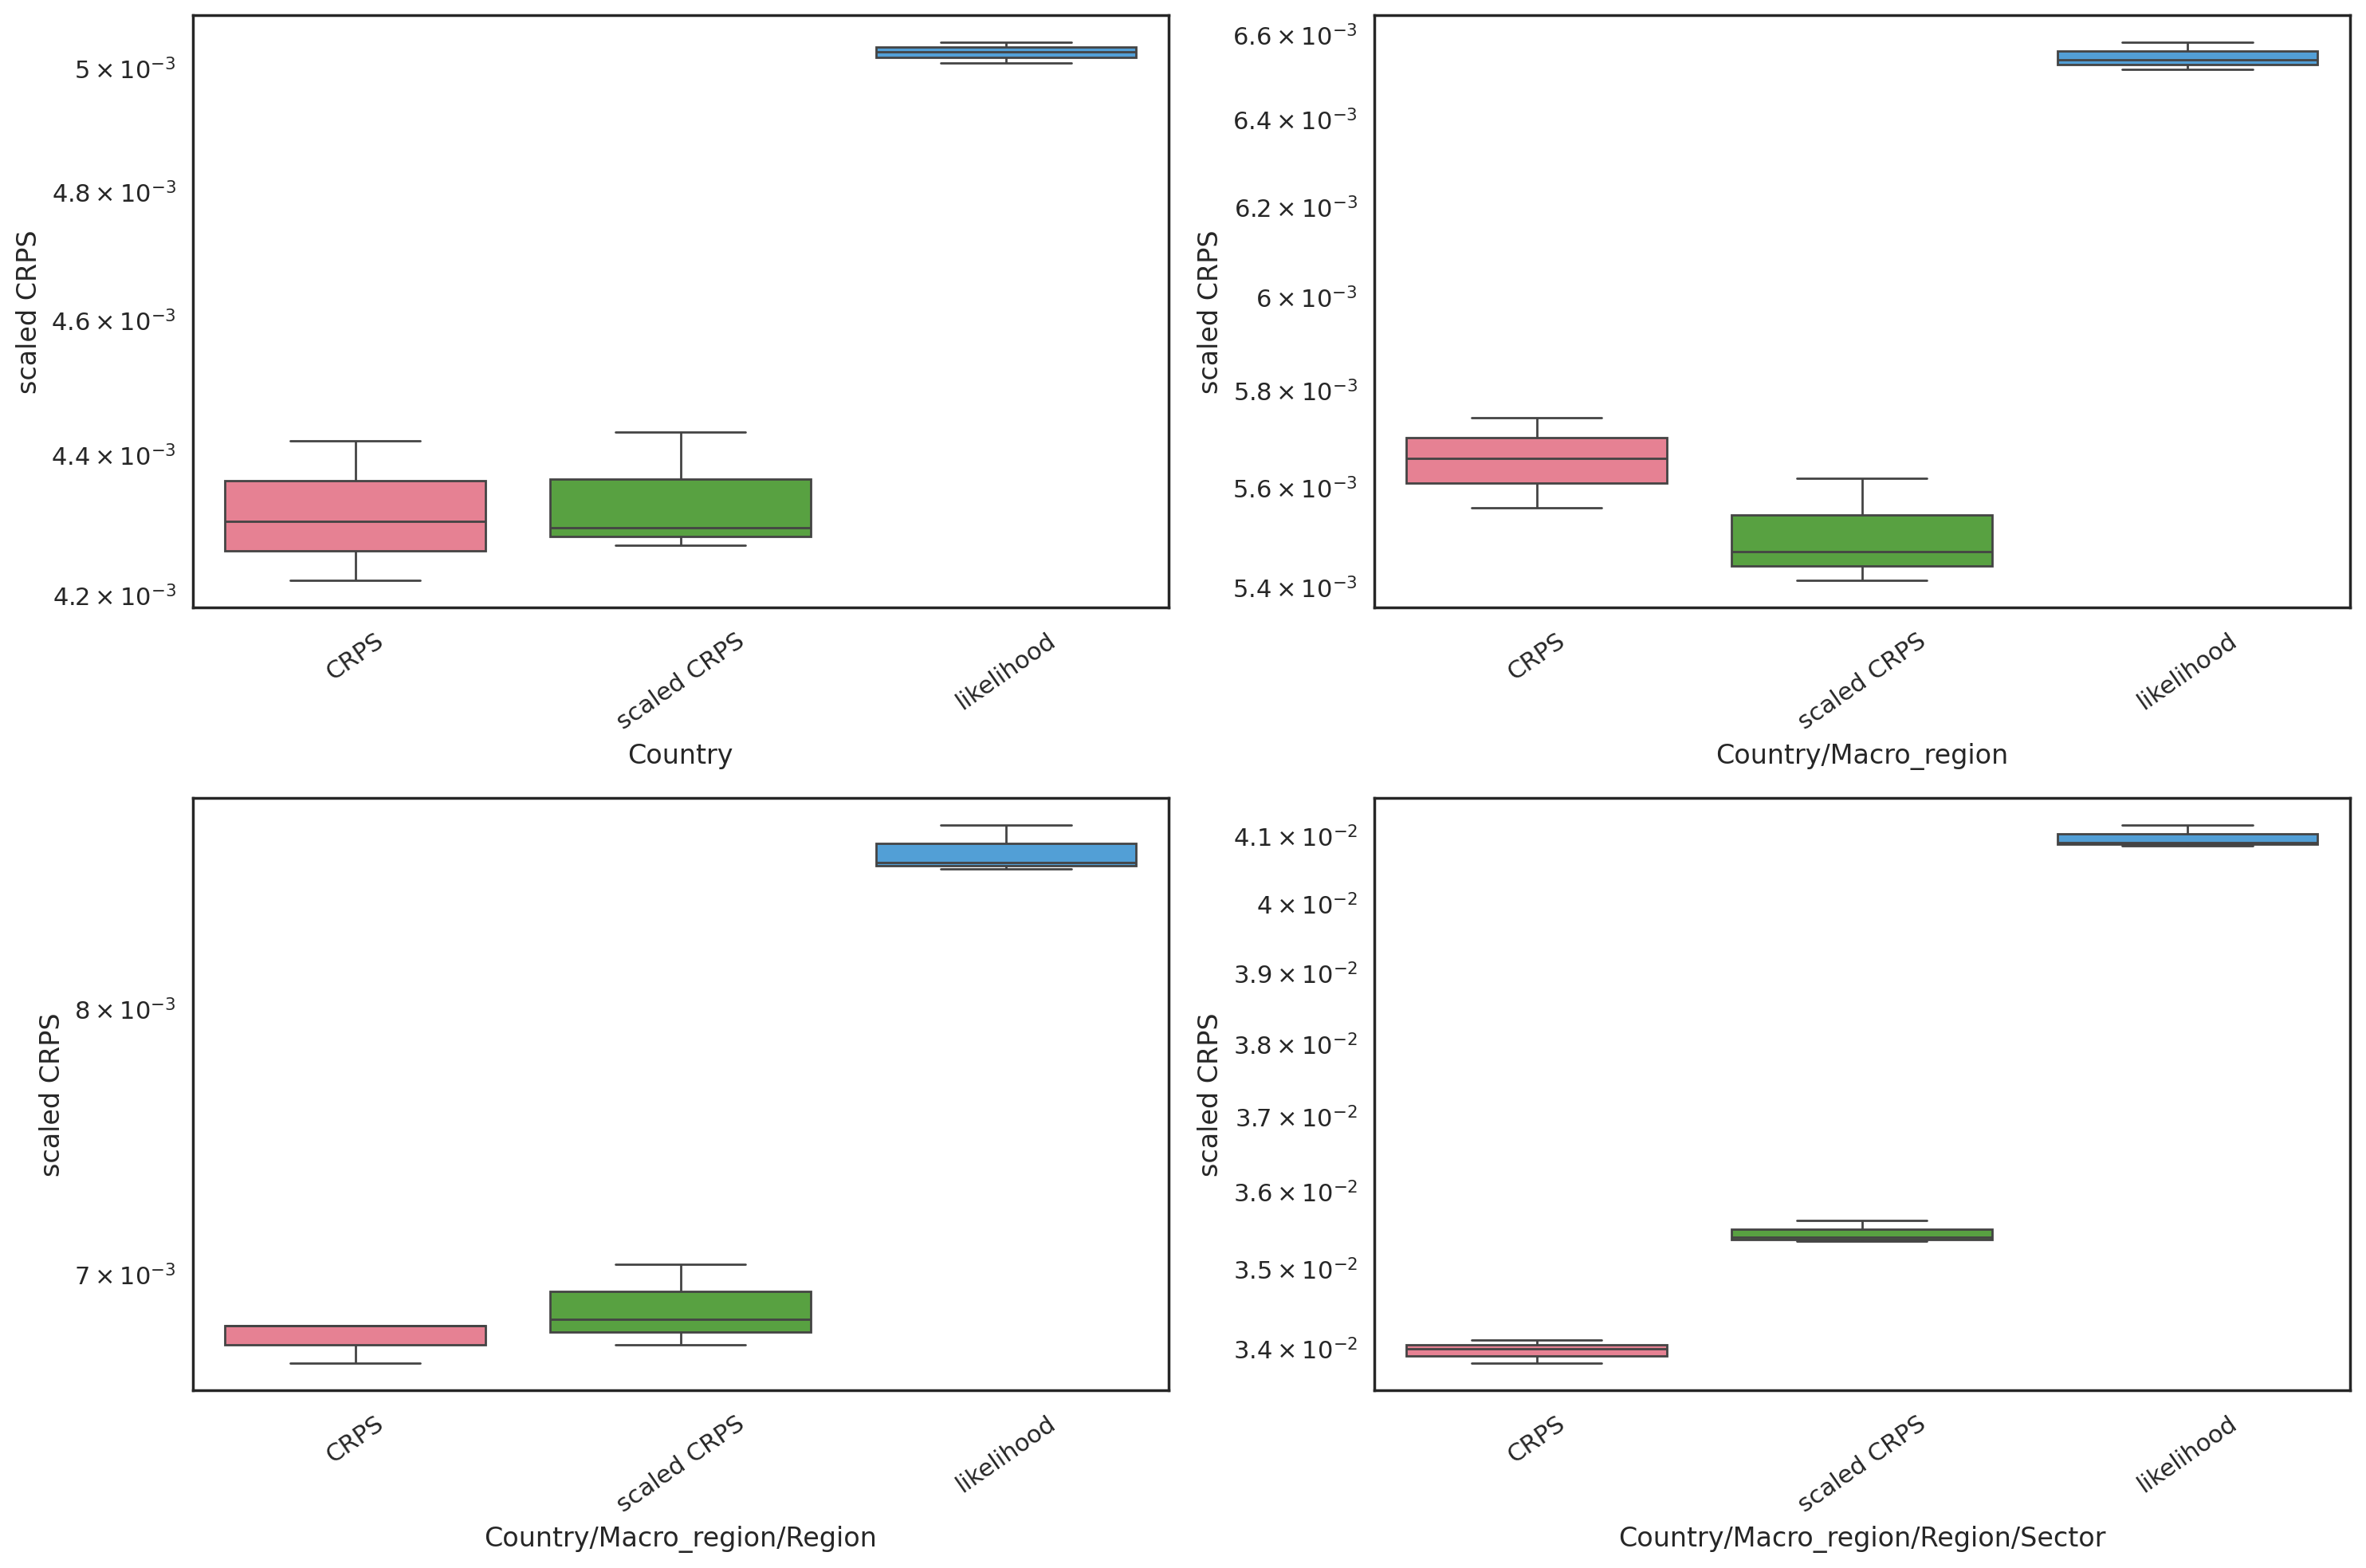

In [15]:
fig, axs = plt.subplots(2,2, figsize = (15,10), sharex = False, dpi = 200)
evv = eval_HierE2E.melt(id_vars = ['level', 'metric'])
evv['variable'] = evv['variable'].str[:-2]
T = evv.variable.unique()
for i,a in enumerate(T) :
    a = a.replace('HierE2E_NHITS_BU_CRPS', 'CRPS')
    a = a.replace('HierE2E_NHITS_BU_sCRPS', 'scaled CRPS')
    a = a.replace('HierE2E_NHITS_BU_likelihood', 'likelihood')
    a = a.replace('Auto', '')
    a = a.replace('MinTrace_method-mint_shrink', 'MinT')
    T[i] = a
for k, level in zip(range(4),eval_HierE2E['level'].unique()):
    evs = evv.query(f'metric == "scaled_crps" & level == "{level}"')
    sns.boxplot(evs, y='value', x = 'variable', ax = axs[k//2,k%2], palette = 'husl')
    axs[k//2,k%2].set_ylabel(' ')
    axs[k//2,k%2].set_xlabel(f'{level}')
    axs[k//2,k%2].set_yscale('log')
    axs[k//2,k%2].set_ylabel('scaled CRPS')
    axs[k//2,k%2].set_xticks(ticks = range(3), labels= T, rotation=35) 
plt.tight_layout()
plt.savefig('./recon_HierE2E', transparent = True, dpi = 400)

/tmp/ipykernel_3268/2827068111.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for item in leg.legendHandles:


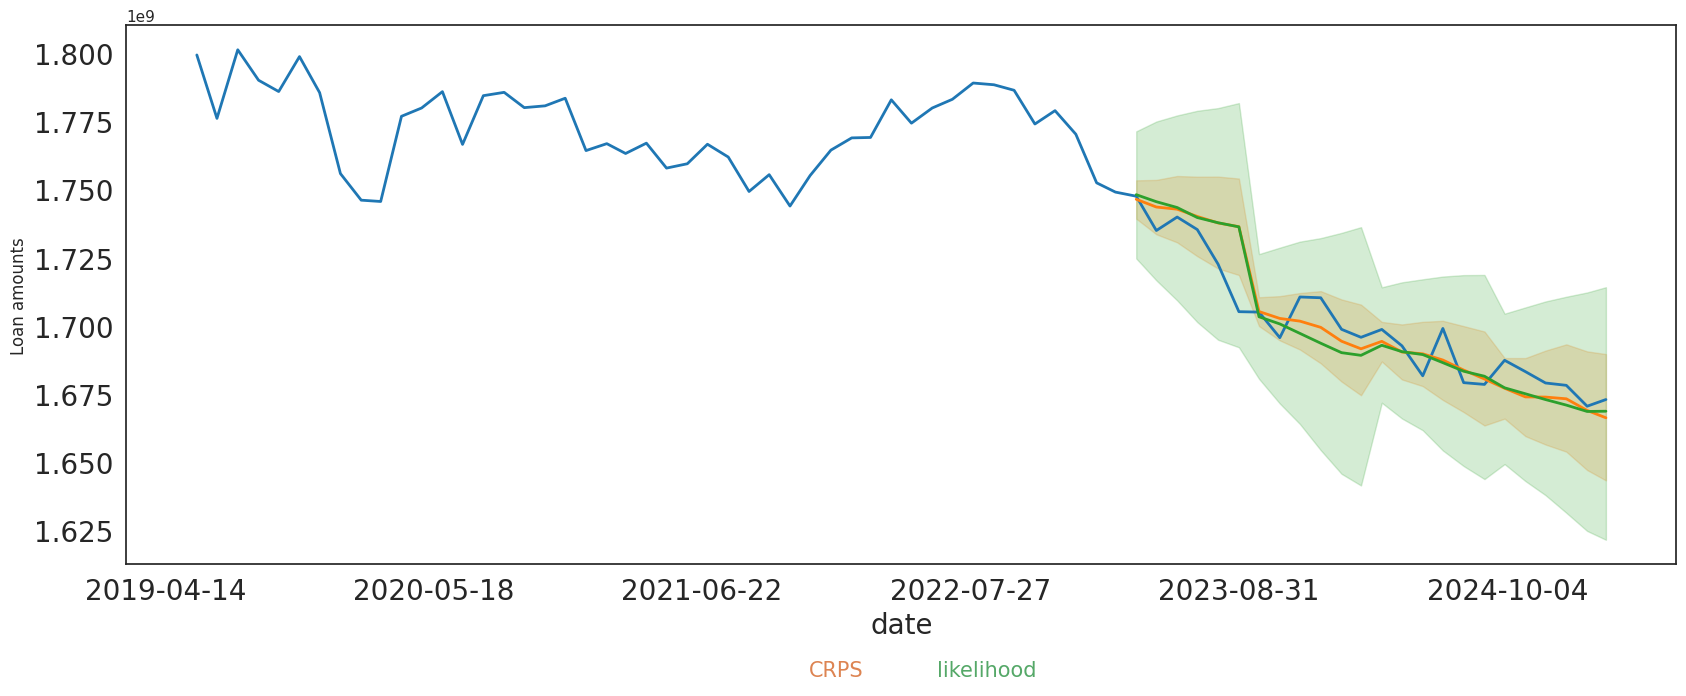

In [15]:
df = pd.read_parquet('./loans_full_hierarchy.parquet')
df['date'] = df.index
Y_df = df.melt(id_vars='date')[['unique_id', 'date' ,'value']].rename(columns={'date' : 'ds', 'value' : 'y'})
tags = pd.read_pickle('./tags.pkl')
S_df = pd.read_parquet('./S_df.parquet')

hplot = HierarchicalPlot(S=S_df, tags=tags)
plot_df = Y_df.merge(Y_fin[Y_fin['cutoff'].isin(Y_fin['cutoff'].unique()[::6])], on = ['unique_id', 'ds', 'y'], how = 'outer')
hplot.plot_series(
    series='IT',
    Y_df= plot_df.groupby('unique_id', as_index=False).tail(70), 
    models=['y', 'HierE2E_NHITS_BU_CRPS_0','HierE2E_NHITS_BU_likelihood_0'],
    level=[80.0]
)
plt.ylabel('Loan amounts')
plt.xlabel('date')
plt.title('')
plt.grid(visible=False)
leg = plt.legend(['CRPS', 'likelihood'], loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol = 3, frameon = False)
for item in leg.legendHandles:
    item.set_visible(False)
c = ['C1', 'C2']
for i,text in enumerate(leg.get_texts()) :
    text.set_color(c[i])
    text.set_size(15)
plt.savefig('IT_forecast_NLLvCRPS', dpi = 200, transparent= True, bbox_inches = 'tight')